# EDA

In [1]:
import ast
import pandas as pd
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore


In [7]:
#Load all the collected data 
cred = credentials.Certificate('C:\\Users\\beatr\\Desktop\\TFG House Prediction\\TfgHousingPrediction\\claves.json')
firebase_admin.initialize_app(cred)
db = firestore.client()

In [8]:
# leo los datos de firebase de la colección cleaned_data 
import pandas as pd 
# Read from the review collection
cleaned_data_ref = db.collection('cleaned_data')

#get all the info
cleaned_data = cleaned_data_ref.get()

# put it into a datframe called data 
data = pd.DataFrame()

# Iterate over the houses and add each house's data to the dataframe
for house in cleaned_data:
    house_data = house.to_dict()
    data = data.append(house_data, ignore_index=True)



C:\Users\beatr\AppData\Local\Temp\ipykernel_17608\2673028925.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_17608\2673028925.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_17608\2673028925.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_index=True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_17608\2673028925.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(house_data, ignore_

In [10]:
len(data)

815

In [6]:
data.head()

,hasLift,hasParking,description,municipality,longitude,typology,price,bathrooms,exterior,status,...,district,rooms,priceByArea,propertyCode,size,country,newDevelopment,province,latitude,floor
0,True,no,Piso en venta de un dormitorio con baño y coci...,Madrid,-3.696292,flat,425000.0,1,True,good,...,Centro,1,7456.0,104112121,57.0,es,False,Madrid,40.419431,1
1,True,no,ADELANTE ofrece maravilloso piso de diseño a e...,Madrid,-3.720573,flat,975000.0,4,True,good,...,Moncloa,3,5838.0,104137339,167.0,es,False,Madrid,40.428505,4
2,True,yes,"Piso muy amplio, exterior, al lado del retiro....",Madrid,-3.686639,flat,2300000.0,3,True,good,...,Retiro,3,9583.0,104160910,240.0,es,False,Madrid,40.406327,5
3,False,no,Novahome presenta estupendo piso completamente...,Madrid,-3.710215,flat,177000.0,1,True,good,...,Centro,1,5900.0,104130100,30.0,es,False,Madrid,40.407592,bj
4,True,no,¡Increíble oportunidad de compra en el Barrio ...,Madrid,-3.696049,flat,1179000.0,3,True,good,...,Centro,3,9744.0,104076070,121.0,es,False,Madrid,40.412279,3


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 0 to 955
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hasLift         766 non-null    object 
 1   longitude       766 non-null    float64
 2   distance        766 non-null    object 
 3   status          766 non-null    object 
 4   rooms           766 non-null    int64  
 5   size            766 non-null    float64
 6   floor           766 non-null    object 
 7   newDevelopment  766 non-null    bool   
 8   description     766 non-null    object 
 9   bathrooms       766 non-null    int64  
 10  municipality    766 non-null    object 
 11  price           766 non-null    float64
 12  exterior        766 non-null    object 
 13  neighborhood    766 non-null    object 
 14  district        766 non-null    object 
 15  priceByArea     766 non-null    float64
 16  propertyCode    766 non-null    object 
 17  country         766 non-null    obj

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data['price'] = data['price'].astype(float)

In [49]:
data['price']

0      1450000.0
1       900000.0
2       270000.0
3      1200000.0
4       689000.0
         ...    
949    1179000.0
950     675000.0
952     430000.0
954     150000.0
955     250000.0
Name: price, Length: 766, dtype: float64

1) Distribución de la variable precio 

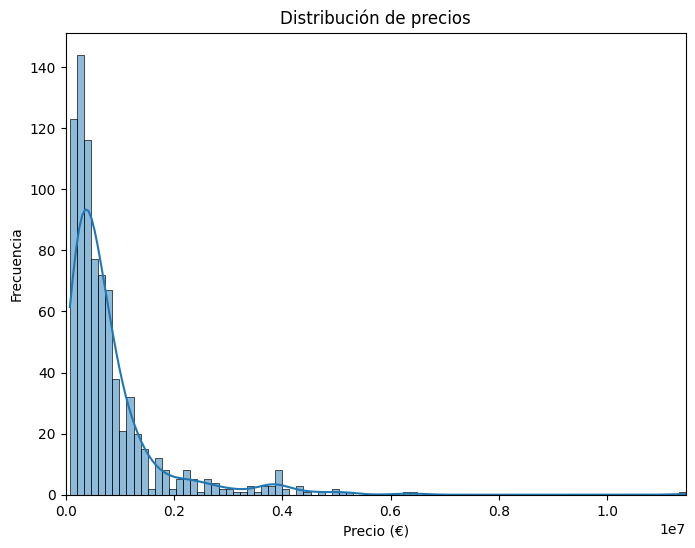

In [9]:
# Plot the distribution of the 'price' variable
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.xlim(0, data['price'].max())  # Adjust the x-axis scale
plt.show()


In [10]:
from scipy.stats import skew, kurtosis

# Calculate the skewness of the "price" variable
skewness = skew(data['price'])

# Calculate the kurtosis of the "price" variable
kurt = kurtosis(data['price'])

print("Skewness:", skewness)
print("Kurtosis:", kurt)


Skewness: 3.84470191397988
Kurtosis: 24.24486743594578


In [10]:
#get statistics of the price
data['price'].describe()


count    8.150000e+02
mean     8.096770e+05
std      9.622014e+05
min      7.800000e+04
25%      2.750000e+05
50%      5.250000e+05
75%      8.920000e+05
max      1.145000e+07
Name: price, dtype: float64

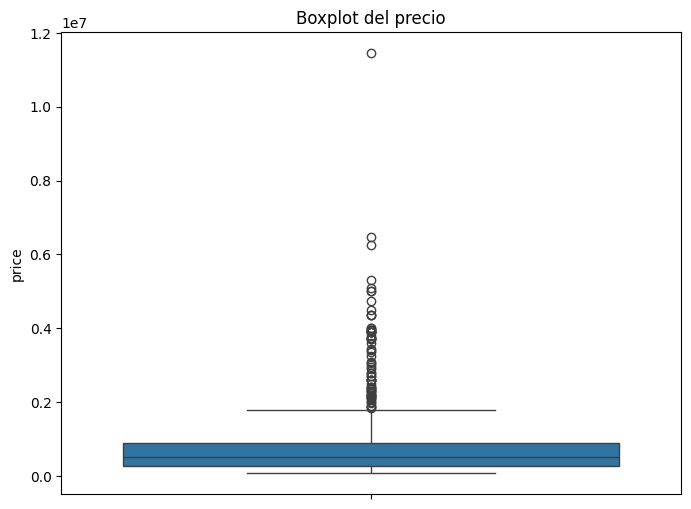

In [11]:
#create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data['price'])
plt.title('Boxplot del precio')

plt.show()

In [11]:
#quitamos los valores atípicos con la regla de las tres sigmas
price_mean = data['price'].mean()
price_std = data['price'].std()

# Calculate the lower and upper bounds
lower_bound = price_mean - 3 * price_std
upper_bound = price_mean + 3 * price_std

# Filter the data to remove the outliers
data = data[(data['price'] > lower_bound) & (data['price'] < upper_bound)]



In [12]:
from scipy.stats import skew, kurtosis

# Calculate the skewness of the "price" variable
skewness = skew(data['price'])

# Calculate the kurtosis of the "price" variable
kurt = kurtosis(data['price'])

print("Skewness:", skewness)
print("Kurtosis:", kurt)

Skewness: 2.0589803340466633
Kurtosis: 4.889685477025809


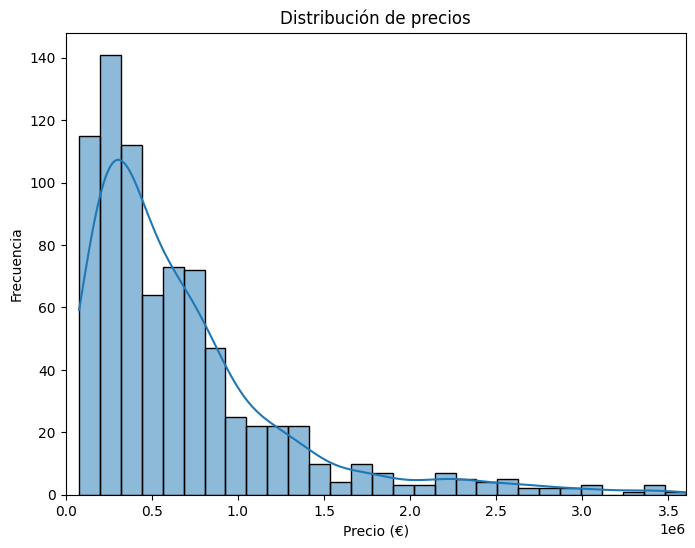

In [13]:
# Plot the distribution of the 'price' variable
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.xlim(0, data['price'].max())  # Adjust the x-axis scale
plt.show()

Text(0.5, 1.0, 'Boxplot del precio')

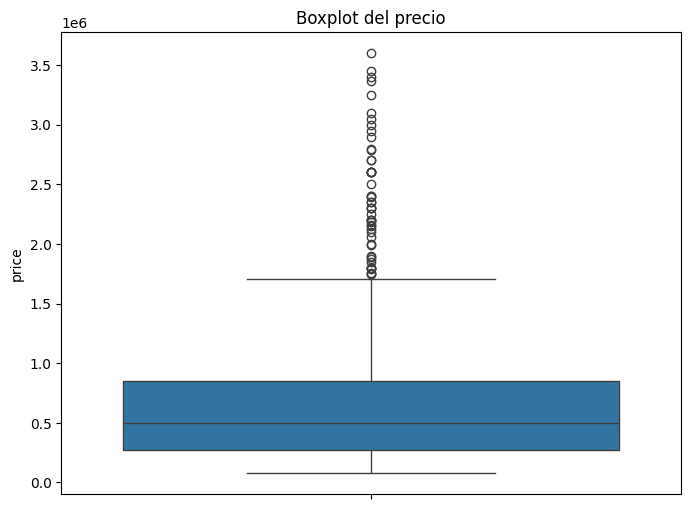

In [14]:
#create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data['price'])
plt.title('Boxplot del precio')


2) Distribución de la variable tamaño

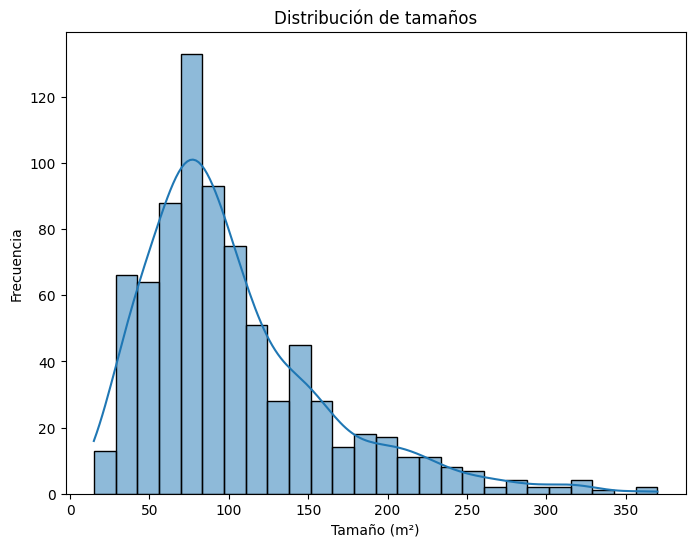

In [14]:
#Distribution of the 'size' variable
plt.figure(figsize=(8, 6))
sns.histplot(data['size'], kde=True)
plt.title('Distribución de tamaños')
plt.xlabel('Tamaño (m²)')
plt.ylabel('Frecuencia')
plt.show()


3) Distribución número de habitaciones 

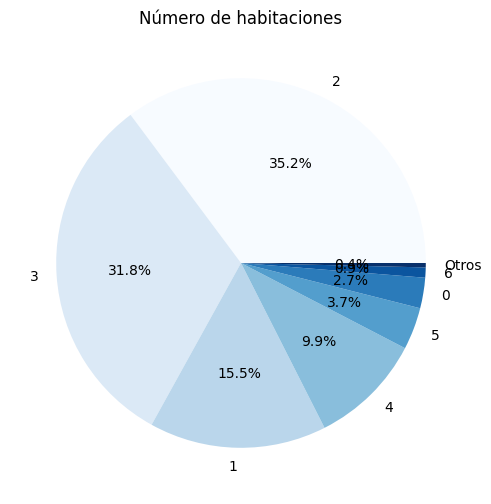

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# Count the occurrences of each number of rooms
room_counts = data['rooms'].value_counts()

# Set a threshold for the number of rooms to include in the chart
threshold = 5

# Filter the data for the top rooms and combine the rest into "Others"
top_rooms = room_counts[room_counts >= threshold]
other_rooms = room_counts[room_counts < threshold]
other_rooms_count = other_rooms.sum()

# Create a list of labels for the pie chart
labels = list(top_rooms.index) + ['Otros']

# Create a list of values for the pie chart
values = list(top_rooms.values) + [other_rooms_count]

# Create a color map in a blue scale
cmap = plt.cm.Blues

# Generate a list of colors based on the number of values
colors = cmap(np.linspace(0, 1, len(values)))

# Create the pie chart with custom colors
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Número de habitaciones')
plt.show()

4) Tamaño según tipo de vivienda

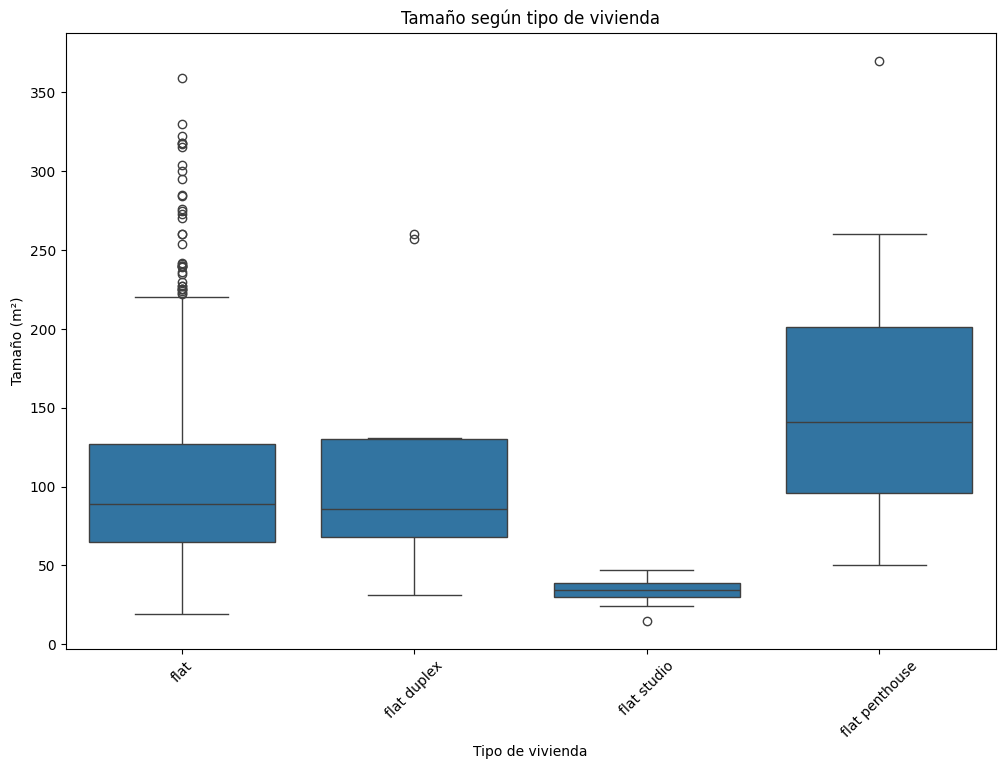

In [16]:
#Distribution of size by typology
plt.figure(figsize=(12, 8))
sns.boxplot(x='typology', y='size', data=data)
plt.title('Tamaño según tipo de vivienda')
plt.xlabel('Tipo de vivienda')
plt.ylabel('Tamaño (m²)')
plt.xticks(rotation=45)
plt.show()


5) Mapa ubicación de las casas 

In [17]:
import folium

# Create a map centered at a specific location
map = folium.Map(location=[40.416729, -3.703339], zoom_start=12)

# Iterate over the houses and add markers to the map
for index, row in data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    marker = folium.Marker(location=[lat, lon])
    marker.add_to(map)

# Display the map
map


6) Matriz de correlación de las variables numéricas. 

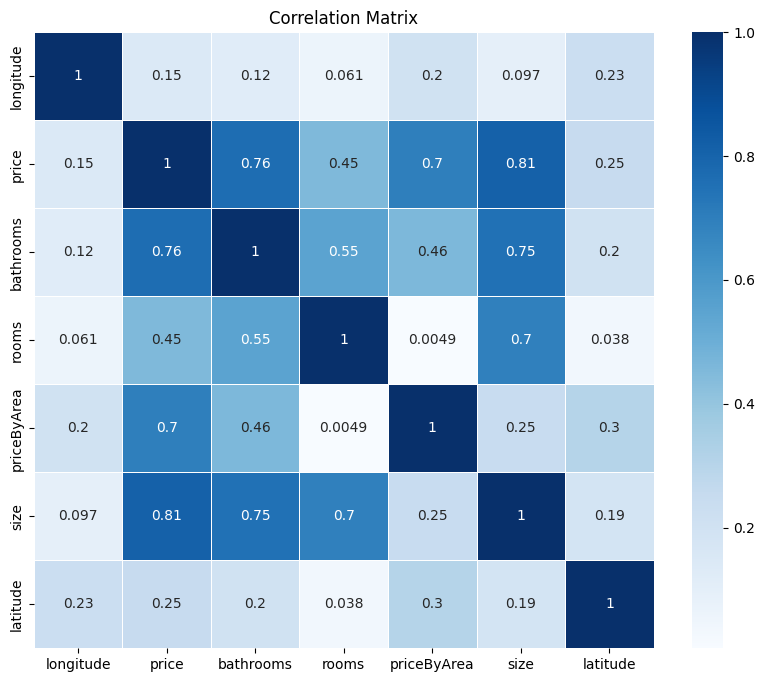

In [18]:
# Correlation matrix of numerical variables
#Choose only numerical variables 
numerical_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


7) Distribución por vecindario, solo cogemos los top 10 para que se vea mejor

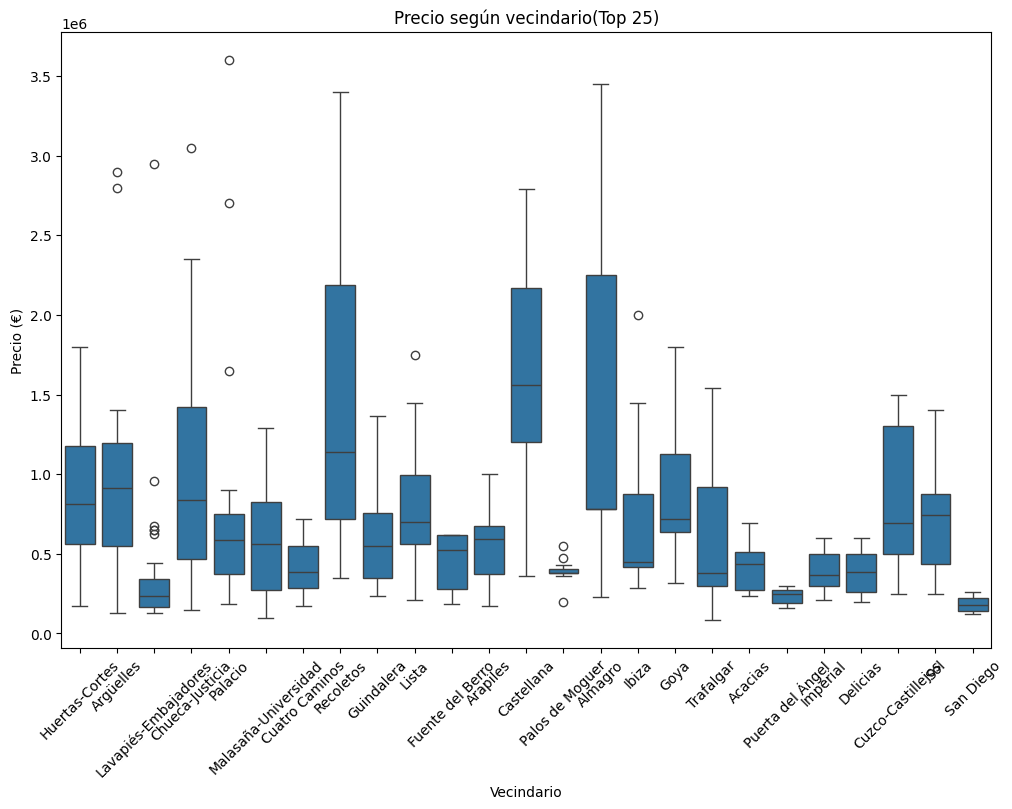

In [16]:
# Count the occurrences of each neighborhood
neighborhood_counts = data['neighborhood'].value_counts()

# Select the top 15 neighborhoods
top_15_neighborhoods = neighborhood_counts.head(25).index

# Filter the data for the top 10 neighborhoods
filtered_data = data[data['neighborhood'].isin(top_15_neighborhoods)]

# Plot price and neighborhood for the top 10 neighborhoods
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighborhood', y='price', data=filtered_data)
plt.title('Precio según vecindario(Top 25)')
plt.xlabel('Vecindario')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.show()


8) Precios medios por barrio, con colores 

In [20]:
# Calculate the average price for each neighborhood
precio_medio_barrio = data.groupby('neighborhood')['price'].mean().sort_values(ascending=False)

# Create a map centered at a specific location
map = folium.Map(location=[40.416729, -3.703339], zoom_start=12)

# Define the color codes and corresponding price ranges
color_codes = {
    'green': 'Menos de 200,000 €',
    'orange': '200,000 - 349,999 €',
    'blue': '350,000 - 499,999 €',
    'purple': '500,000 - 649,999 €',
    'yellow': '650,000 - 799,999 €',
    'black': '800,000 - 949,999 €',
    'pink': '950,000 - 1,099,999 €',
    'red': '1,100,000 € y superior'
}

# Iterate over the neighborhoods and add markers to the map
for neighborhood, price in precio_medio_barrio.items():
    lat = data[data['neighborhood'] == neighborhood]['latitude'].mean()
    lon = data[data['neighborhood'] == neighborhood]['longitude'].mean()
    
    # Define the color based on the price
    if price < 200000:
        color = 'green'
    elif price < 350000:
        color = 'orange'
    elif price < 500000:
        color = 'blue'
    elif price < 650000:
        color = 'purple'
    elif price < 800000:
        color = 'yellow'
    elif price < 950000:
        color = 'black'
    elif price < 1100000:
        color = 'pink'
    else:
        color = 'red'
    
    # Create a CircleMarker with the specified color
    marker = folium.CircleMarker(location=[lat, lon], radius=5, color=color, fill=True, fill_color=color)
    
    # Add the marker to the map
    marker.add_to(map)

# Create an HTML table for the corner content
table_html = f"""
<table style="position: fixed; top: 10px; left: 10px; background-color: white; z-index: 9999;">
    <tr>
        <th>Color</th>
        <th> Rango de precio medio</th>
    </tr>
"""
for code, price_range in color_codes.items():
    table_html += f"""
    <tr>
        <td style="background-color: {code};"></td>
        <td>{price_range}</td>
    </tr>
    """
table_html += "</table>"

# Add the HTML table to the map
map.get_root().html.add_child(folium.Element(table_html))

# Display the map
map


9) Cuantas casas tenemos por vecindario? 

Text(0, 0.5, 'Número de casas')

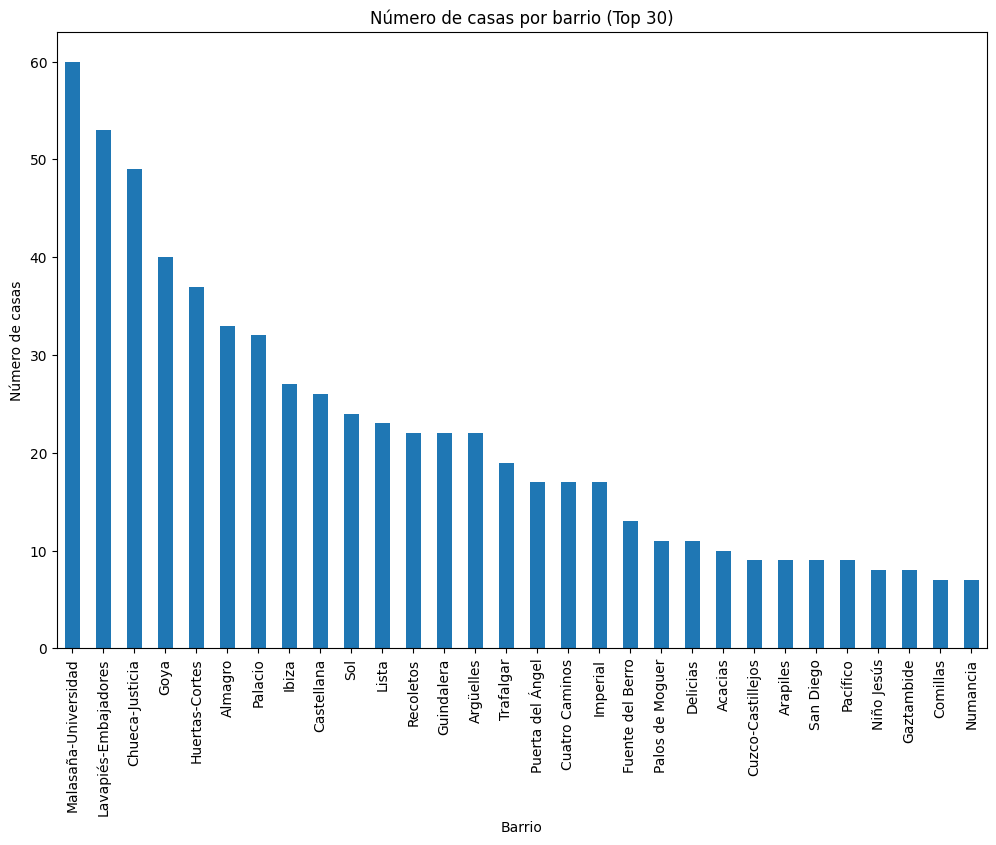

In [21]:
#count de casas por barrio
data['neighborhood'].value_counts()

# Count of houses per neighborhood (top 30)
top_30_neighborhoods = data['neighborhood'].value_counts().head(30)


# Create a bar plot of the top 30 neighborhoods
plt.figure(figsize=(12, 8))
top_30_neighborhoods.plot(kind='bar')
plt.title('Número de casas por barrio (Top 30)')
plt.xlabel('Barrio')
plt.ylabel('Número de casas')


10) Analizamos variables categóricas 

Text(0.5, 1.0, 'Distribución de hasParking')

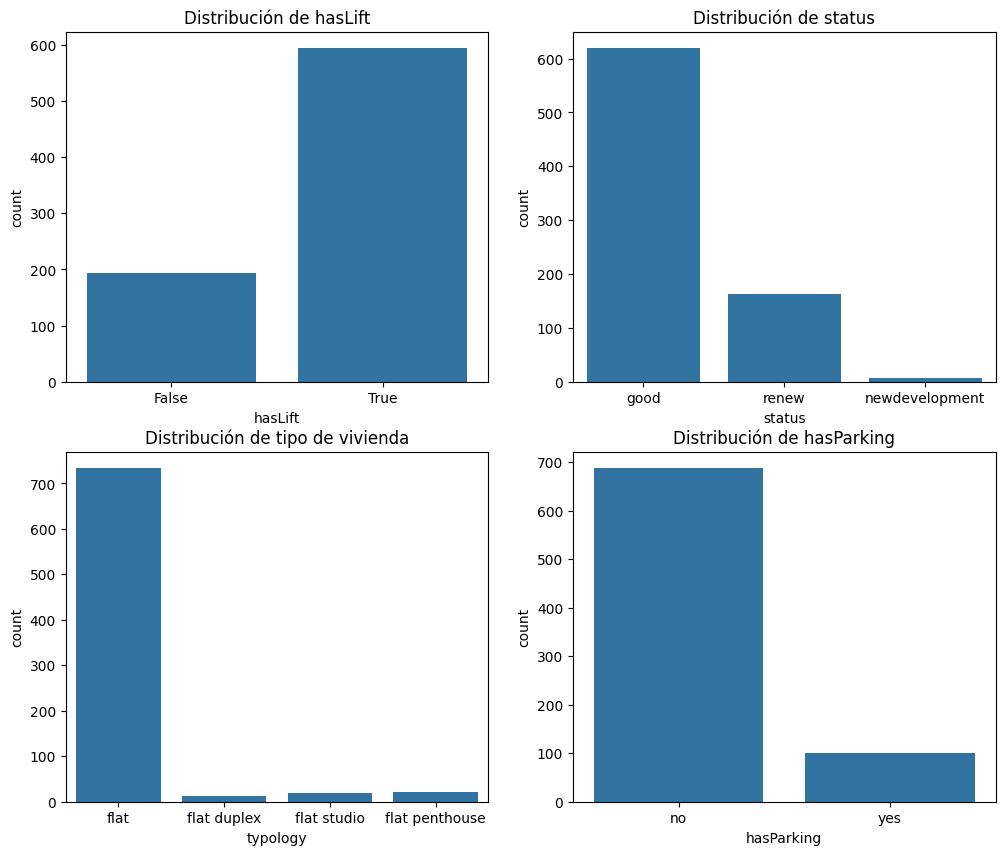

In [22]:
#grafica que muestre la distribucion de las variables haslift, status, newDevelopmet, hasParking
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the distribution of the 'hasLift' variable
sns.countplot(ax=axes[0, 0], x='hasLift', data=data)
axes[0, 0].set_title('Distribución de hasLift')

# Plot the distribution of the 'status' variable
sns.countplot(ax=axes[0, 1], x='status', data=data)
axes[0, 1].set_title('Distribución de status')

# Plot the distribution of the 'newDevelopment' variable
sns.countplot(ax=axes[1, 0], x='typology', data=data)
axes[1, 0].set_title('Distribución de tipo de vivienda')

# Plot the distribution of the 'hasParking' variable
sns.countplot(ax=axes[1, 1], x='hasParking', data=data)
axes[1, 1].set_title('Distribución de hasParking')

